# Analyzing Changes in Electorate by Location

## Summary
This notebook analyzes trends related to the location of the Brazilian electorate Population, looking into how the location of immigrant Brazilian voters has changed over time.

---

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities


In [2]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)

    return df

In [3]:
df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')

In [4]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined


Aggregate Data


,Unnamed: 0,election_year,place_(zz_=_exterior),municipality_code,municipality_name,gender_code,gender_description,marital_status_code,marital_status_description,age_group_code,age_group_description,educational_attainment_code,educational_attainment_description,quantity_of_voters
0,0,1998,ZZ,11487,POLONIA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,57
1,1,1998,ZZ,98361,NIGERIA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,44
2,2,1998,ZZ,98965,ANGOLA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,95
3,3,1998,ZZ,98507,COSTA RICA,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,95
4,4,1998,ZZ,98620,BULGARIA,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76996,33635,2018,ZZ,29190,JAMAICA,2,MASCULINO,3.0,CASADO,5559.0,45 A 59 ANOS,8,SUPERIOR COMPLETO,3
76997,33636,2018,ZZ,29190,JAMAICA,2,MASCULINO,3.0,CASADO,6569.0,60 A 69 ANOS,7,SUPERIOR INCOMPLETO,1
76998,33637,2018,ZZ,29190,JAMAICA,2,MASCULINO,9.0,DIVORCIADO,5559.0,45 A 59 ANOS,7,SUPERIOR INCOMPLETO,1
76999,33638,2018,ZZ,29190,JAMAICA,4,FEMININO,3.0,CASADO,4549.0,45 A 59 ANOS,6,ENSINO MEDIO COMPLETO,1


---

# General Analysis (All Countries)

## Change in Total Number Voters
Below, we plot the total number of Brazilian Immigrant voters by year. The number of Brazilian immigrant voters has increased for each dataset analyzed. Notably, the number of Brazilian immigrant roughly doubled between 2006 and 2010 as well as between 2010 and 2018. 

In [5]:
def plot_total_voters(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["quantity_of_voters"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Electorate Population")
    plt.title("Brazilian Immigrant Electorate Size by Year")
    
  

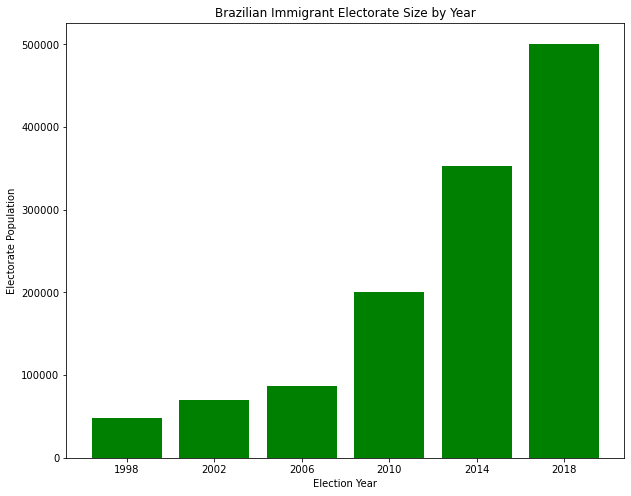

In [6]:
plot_total_voters(df_combined)

## Change in Countries with Brazilian Immigrant Voters
Below, we plot the number of countries with Brazilian immigrant voters by year. While the number of countries was rooughly flat between 1998 and 2006, this number been increasing since 2010. Notably, some of this increase may be due to the emergence of new countries (eg, Bosnia, Serbia, etc.) brought about by the breakup of countries like Yugoslavia and Czechoslovakia (prior to 2010, Yugoslavia and Czechoslovakia were used to identify any of the now-independent countries which comprised these nations) 

In [7]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries Represented by Brazilian Immigrant Electorate by Year")



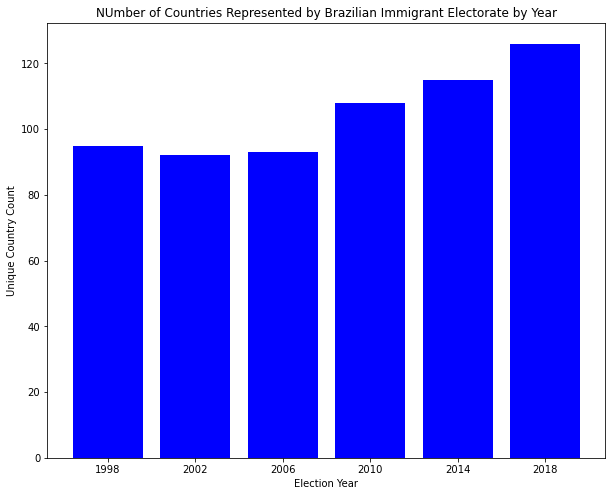

In [8]:
plot_total_countries(df_combined)

## Brazilian Immigrant Voters by Country

In [9]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries
    

In [10]:
countries = calculate_country_pop(df_combined)

### Countries with Most Brazilian Immigrant Voters
Below, we list the top 10 countries with the most Brazilian Immigrant Voters for each Presidential Election year (1998-2018)

### 1998
In 1998, the United States, Italy, Portugal, and Germany contained the most Brazilian Immigrant Voters

In [11]:
countries = countries.sort_values(by=[1998], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0
11800,BOLIVIA,1671.0,1426.0,1141.0,1671.0,2348.0,3050.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0


### 2002
In 2002, the United States, Portugal, Italy, and Germany contained the most Brazilian Immigrant Voters (with Portugal surpassing Italy for second place)

In [12]:
countries = countries.sort_values(by=[2002], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0
11320,GUIANA FRANCESA,1303.0,1534.0,1613.0,3278.0,3519.0,3641.0


### 2006
In 2006, the top 4 countries remained the same (though England surpassed Switzerland for 5th place)

In [13]:
countries = countries.sort_values(by=[2006], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
11444,PARAGUAI,740.0,987.0,2292.0,4155.0,6161.0,7518.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0


### 2010
In 2010, the number of voters in Japan appears to increase 20x, moving the country into 4th place

In [14]:
countries = countries.sort_values(by=[2010], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0


### 2014
In 2014, Japan moved past Portugal and Italy to become the country with the second most Brazilian immigrant voters

In [15]:
countries = countries.sort_values(by=[2014], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0


### 2018
In 2018, the top countries for Brazilian voters remained roughly the same, with England surpassing Italy for 4th place

In [16]:
countries = countries.sort_values(by=[2018], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0


### Growth of Brazilian Immigrant Voter Population by Country
Below, we list the top 10 fastest growing Brazilian Immigrant Voter populations by country for each Presidential Election year (1998-2018)

In [17]:
def calculate_country_growth(df, ignore_init=False):
    '''
    Calculates country growth rate among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country growth rate
    '''
    
    #Source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
    pct_change = df.pct_change(axis='columns', periods=1)
    
    if ignore_init:
        #Replace infinities with Nans
        #Source - https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
        pct_change.replace([np.inf, -np.inf], 100, inplace=True)
    else:
        pct_change.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    #Fills Nans with 0's
    pct_change = pct_change.fillna(0)

    return pct_change

In [18]:
pct_change = calculate_country_growth(countries)

### 1998
As 1998 is our base year, there is no "previous year" from which to calculate growth.

In [19]:
pct_change = pct_change.sort_values(by=[1998], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,0.0,1.131863,0.308900,1.090764,0.676905,0.425409
39020,CROACIA,0.0,0.000000,0.000000,0.000000,3.090909,0.244444
38962,TANZANIA,0.0,0.000000,0.000000,0.000000,0.035714,0.206897
0,NEPAL,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2800,VIETNA,0.0,-0.285714,0.000000,1.800000,-0.214286,2.545455
99180,COMUNIDADE DAS BAHAMAS,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
39160,ESLOVENIA,0.0,0.000000,0.000000,0.000000,0.000000,0.363636
98124,TUNISIA,0.0,0.117647,-0.131579,0.212121,0.150000,-0.021739
99317,ESTONIA,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### 2002
In 2002, Syria, Kenya, Cuba, Zimbabwe, and Korea were the fastest growing countries in terms of Brazilian immigrant voter population.

In [20]:
pct_change = pct_change.sort_values(by=[2002], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98221,SIRIA,0.0,3.142857,0.632184,0.112676,0.424051,-0.133333
29165,KENIA,0.0,2.388889,-0.049180,-0.034483,0.250000,-0.028571
98868,CUBA,0.0,2.202128,0.524917,0.115468,-0.357422,-0.656535
29092,ZIMBABWE,0.0,2.000000,-0.333333,-0.333333,-0.125000,-0.285714
11207,COREIA,0.0,1.200000,-0.012987,-0.157895,0.062500,0.544118
98744,SUECIA,0.0,1.176724,0.437624,0.957300,0.363125,0.407847
11266,ESTADOS UNIDOS,0.0,1.131863,0.308900,1.090764,0.676905,0.425409
98060,GABAO,0.0,1.130435,0.061224,-0.173077,-0.395349,-0.192308
98841,INGLATERRA,0.0,0.934752,0.297654,0.972034,1.424581,0.531195


### 2006
In 2006, Namibia, Israel, Libya, Algeria, and New Zealand were the fastest growing countries in terms of Brazilian immigrant voter population.

In [21]:
pct_change = pct_change.sort_values(by=[2006], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
29068,NAMIBIA,0.0,0.000000,3.600000,0.217391,0.785714,0.020000
11347,ISRAEL,0.0,0.045267,3.181102,-0.734463,1.223404,2.342903
11401,LIBANO,0.0,0.031830,2.179949,0.084074,0.715138,0.920435
98701,ARGELIA,0.0,-0.777778,2.000000,4.333333,-0.531250,0.000000
29050,NOVA ZELANDIA,0.0,0.000000,1.500000,4.894118,0.846307,1.009730
11444,PARAGUAI,0.0,0.333784,1.322188,0.812827,0.482792,0.220256
98965,ANGOLA,0.0,0.070922,1.026490,-0.101307,-0.221818,0.598131
98981,AUSTRALIA,0.0,0.308157,0.912240,1.391304,1.885354,0.442675
29130,MALASIA,0.0,-0.394737,0.826087,0.452381,0.344262,0.560976


### 2010
In 2010, the population of Brazilian voters in Japan increased roughly 20x over 2006. Jamaica similarly expdrienced a major increase

In [22]:
pct_change = pct_change.sort_values(by=[2010], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11380,JAPAO,0.0,0.046400,-0.146789,20.195341,2.182379,0.612944
29190,JAMAICA,0.0,-1.000000,0.000000,12.333333,0.175000,1.000000
29050,NOVA ZELANDIA,0.0,0.000000,1.500000,4.894118,0.846307,1.009730
11541,SURINAME,0.0,-0.094527,-0.148352,4.580645,1.675145,-0.191876
98701,ARGELIA,0.0,-0.777778,2.000000,4.333333,-0.531250,0.000000
11240,ESPANHA,0.0,0.807365,0.234326,3.002540,1.125476,0.549519
98540,CHINA,0.0,0.833333,-0.247475,2.342282,0.415663,0.493617
11363,ITALIA,0.0,0.128088,-0.000851,2.171526,0.420385,0.203609
11525,SUICA,0.0,0.042819,-0.166456,2.143615,0.850169,0.281386


### 2014
In 2014, the UAE had the most growth in terms of its Brazilian immigrant over population (637%), with Ukraine following in second place

In [23]:
pct_change = pct_change.sort_values(by=[2014], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98728,EMIRADOS ARABES,0.0,-0.303030,-0.173913,0.684211,6.375000,2.707627
11762,UCRANIA,0.0,0.250000,-0.600000,-0.250000,4.333333,1.937500
39020,CROACIA,0.0,0.000000,0.000000,0.000000,3.090909,0.244444
39241,CAZAQUISTAO,0.0,0.000000,0.000000,0.000000,3.000000,0.750000
11428,MEXICO,0.0,-0.175481,-0.107872,1.392157,2.443989,0.356208
11380,JAPAO,0.0,0.046400,-0.146789,20.195341,2.182379,0.612944
98108,TURQUIA,0.0,-0.325581,-0.137931,0.280000,2.125000,1.010000
29033,IRLANDA,0.0,0.134146,0.301075,0.677686,2.083744,2.372204
98981,AUSTRALIA,0.0,0.308157,0.912240,1.391304,1.885354,0.442675


### 2018
In 2018, the UAE continued to experience the most growth in its Brazilian immigrant voter population (compared with the previous election year) and Vietnam experience the second highest growth rate after having a negative growth rate in it Brazilian immigrant voter population between 2010 and 2014

In [24]:
pct_change = pct_change.sort_values(by=[2018], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98728,EMIRADOS ARABES,0.0,-0.303030,-0.173913,0.684211,6.375000,2.707627
2800,VIETNA,0.0,-0.285714,0.000000,1.800000,-0.214286,2.545455
29033,IRLANDA,0.0,0.134146,0.301075,0.677686,2.083744,2.372204
11347,ISRAEL,0.0,0.045267,3.181102,-0.734463,1.223404,2.342903
11762,UCRANIA,0.0,0.250000,-0.600000,-0.250000,4.333333,1.937500
98140,TRINIDAD TOBAGO,0.0,-0.111111,0.041667,-0.160000,0.571429,1.878788
29025,HONG KONG,0.0,0.231343,-0.084848,0.158940,0.240000,1.599078
39209,ESLOVAKIA,0.0,0.000000,0.000000,0.000000,0.000000,1.500000
2828,TAIWAN,0.0,0.196970,0.113924,-0.045455,1.619048,1.400000


## Gender by Country

### Below, we show the gender breakdown for the countris with the most Brazilian immigrant voters

In [25]:
def calculate_country_gender_pop(df):
    '''
    Determines Population by gender among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations by gender
    '''
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "gender_description", "election_year", ]).quantity_of_voters.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [26]:
def calculate_gender_ratio(df_orig):
    '''
    Calculates the % males and % females for each country within a given year
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing a column indicating the % males and % females for each country by year
    '''
    
    df = df_orig.copy() #Create a copy of the dataframe
    
    #Calculate Total Numbers of Voters for each year and location
    total_voters = pd.DataFrame(df.groupby(["election_year", "municipality_code"]).quantity_of_voters.sum().reset_index())
    
    #Combine all voters by municipality code, country name, gender description, and year
    df = pd.DataFrame(df.groupby(["municipality_code", "municipality_name", "gender_description", "election_year", ]).quantity_of_voters.sum().reset_index())
    
    #Create a temporary Ratios column to hold the gender ratuis
    ratios = pd.DataFrame(0.0, index=np.arange(len(df)), columns=['ratios'])
    
    
    #Iterate through dataframe and calculate % for each gender 
    for row_idx in df.index:
        code = df.at[row_idx, 'municipality_code']
        year = df.at[row_idx, 'election_year']
        voters = df.at[row_idx, 'quantity_of_voters']
        num_voters_total = total_voters[(total_voters.municipality_code == code) & (total_voters.election_year == year)].quantity_of_voters.values[0]
        ratios.at[row_idx, 'ratios'] = voters/num_voters_total
        
    

    #Add Ratios to Dataframe
    df['ratios'] = ratios['ratios']
    
    #Clean Up NA
    df = df.fillna(0.0)
    
    
    return df
    
    

In [27]:
#GroupBY object with the breakdown of population by gender for each country
gender_pop_by_country = calculate_country_gender_pop(df_combined)

#### Gender Breakdown for most populous Countries (2018)

In [28]:
gender_pop_by_country.sort_values(by=2018, ascending=False)

election_year                                             1998     2002  \
municipality_code municipality_name gender_description                    
11266             ESTADOS UNIDOS    FEMININO            6244.0  13772.0   
                                    MASCULINO           5230.0  10689.0   
11380             JAPAO             MASCULINO            337.0    347.0   
                                    FEMININO             288.0    307.0   
11509             PORTUGAL          FEMININO            1811.0   3289.0   
...                                                        ...      ...   
98388             NICARAGUA         FEMININO              62.0     75.0   
29114             MOCAMBIQUE        FEMININO             124.0    112.0   
                                    MASCULINO            122.0     91.0   
29173             IUGUSLAVIA        FEMININO              13.0     13.0   
98388             NICARAGUA         MASCULINO             45.0     60.0   

election_year                                              2006     2010  \
municipality_code municipality_name gender_description                     
11266             ESTADOS UNIDOS    FEMININO            18384.0  38475.0   
                                    MASCULINO           13633.0  28465.0   
11380             JAPAO             MASCULINO             297.0   6171.0   
                                    FEMININO              261.0   5656.0   
11509             PORTUGAL          FEMININO             4217.0  13362.0   
...                                                         ...      ...   
98388             NICARAGUA         FEMININO               84.0      0.0   
29114             MOCAMBIQUE        FEMININO              184.0      0.0   
                                    MASCULINO             143.0      0.0   
29173             IUGUSLAVIA        FEMININO               14.0      0.0   
98388             NICARAGUA         MASCULINO              60.0      0.0   

election_year                                              2014     2018  
municipality_code municipality_name gender_description                    
11266             ESTADOS UNIDOS    FEMININO            64558.0  90941.0  
                                    MASCULINO           47694.0  69064.0  
11380             JAPAO             MASCULINO           20410.0  33533.0  
                                    FEMININO            17228.0  27175.0  
11509             PORTUGAL          FEMININO            17788.0  23951.0  
...                                                         ...      ...  
98388             NICARAGUA         FEMININO                0.0      0.0  
29114             MOCAMBIQUE        FEMININO                0.0      0.0  
                                    MASCULINO               0.0      0.0  
29173             IUGUSLAVIA        FEMININO                0.0      0.0  
98388             NICARAGUA         MASCULINO               0.0      0.0  

[260 rows x 6 columns]

In [29]:
#DF with the percentage male/female for each country
ratios = calculate_gender_ratio(df_combined)

### Gender Ratios by Year (Most Populous Countries)


#### 1998

In [30]:
ratios[ratios['election_year'] == 1998].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
122,11266,ESTADOS UNIDOS,FEMININO,1998,6244,0.544187
128,11266,ESTADOS UNIDOS,MASCULINO,1998,5230,0.455813
182,11363,ITALIA,FEMININO,1998,2927,0.702087
26,11100,ALEMANHA,FEMININO,1998,2499,0.711358
278,11525,SUICA,FEMININO,1998,2282,0.751647
...,...,...,...,...,...,...
536,29190,JAMAICA,MASCULINO,1998,2,0.400000
1066,98680,BANGLADESH,FEMININO,1998,2,0.500000
1067,98680,BANGLADESH,MASCULINO,1998,2,0.500000
326,11762,UCRANIA,FEMININO,1998,2,0.250000


#### 2002

In [31]:
ratios[ratios['election_year'] == 2002].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
123,11266,ESTADOS UNIDOS,FEMININO,2002,13772,0.563019
129,11266,ESTADOS UNIDOS,MASCULINO,2002,10689,0.436981
183,11363,ITALIA,FEMININO,2002,3472,0.738252
267,11509,PORTUGAL,FEMININO,2002,3289,0.511429
273,11509,PORTUGAL,MASCULINO,2002,3142,0.488571
...,...,...,...,...,...,...
3,2800,VIETNA,FEMININO,2002,3,0.600000
413,29068,NAMIBIA,MASCULINO,2002,2,0.400000
9,2800,VIETNA,MASCULINO,2002,2,0.400000
1075,98701,ARGELIA,MASCULINO,2002,1,0.500000


#### 2006

In [32]:
ratios[ratios['election_year'] == 2006].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
124,11266,ESTADOS UNIDOS,FEMININO,2006,18384,0.574195
130,11266,ESTADOS UNIDOS,MASCULINO,2006,13633,0.425805
268,11509,PORTUGAL,FEMININO,2006,4217,0.552687
184,11363,ITALIA,FEMININO,2006,3579,0.761651
274,11509,PORTUGAL,MASCULINO,2006,3413,0.447313
...,...,...,...,...,...,...
1070,98701,ARGELIA,FEMININO,2006,3,0.500000
438,29092,ZIMBABWE,MASCULINO,2006,3,0.250000
4,2800,VIETNA,FEMININO,2006,3,0.600000
10,2800,VIETNA,MASCULINO,2006,2,0.400000


#### 2010

In [33]:
ratios[ratios['election_year'] == 2010].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
125,11266,ESTADOS UNIDOS,FEMININO,2010,38475,0.574768
131,11266,ESTADOS UNIDOS,MASCULINO,2010,28465,0.425232
269,11509,PORTUGAL,FEMININO,2010,13362,0.576395
185,11363,ITALIA,FEMININO,2010,11027,0.739918
275,11509,PORTUGAL,MASCULINO,2010,9820,0.423605
...,...,...,...,...,...,...
487,29149,LIBIA,MASCULINO,2010,2,0.181818
439,29092,ZIMBABWE,MASCULINO,2010,2,0.250000
642,30929,SRI LANKA,MASCULINO,2010,1,0.500000
639,30929,SRI LANKA,FEMININO,2010,1,0.500000


#### 2014

In [34]:
ratios[ratios['election_year'] == 2014].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
126,11266,ESTADOS UNIDOS,FEMININO,2014,64558,0.575117
132,11266,ESTADOS UNIDOS,MASCULINO,2014,47694,0.424883
204,11380,JAPAO,MASCULINO,2014,20410,0.542271
270,11509,PORTUGAL,FEMININO,2014,17788,0.599730
198,11380,JAPAO,FEMININO,2014,17228,0.457729
...,...,...,...,...,...,...
760,98060,GABAO,MASCULINO,2014,2,0.076923
648,38881,BELIZE,FEMININO,2014,1,0.250000
640,30929,SRI LANKA,FEMININO,2014,1,0.333333
687,39187,REPUBLICA DO CONGO,FEMININO,2014,1,0.071429


#### 2018

In [35]:
ratios[ratios['election_year'] == 2018].sort_values(by=['quantity_of_voters'], ascending=False)

,municipality_code,municipality_name,gender_description,election_year,quantity_of_voters,ratios
127,11266,ESTADOS UNIDOS,FEMININO,2018,90941,0.568363
133,11266,ESTADOS UNIDOS,MASCULINO,2018,69064,0.431637
205,11380,JAPAO,MASCULINO,2018,33533,0.552365
199,11380,JAPAO,FEMININO,2018,27175,0.447635
271,11509,PORTUGAL,FEMININO,2018,23951,0.612276
...,...,...,...,...,...,...
641,30929,SRI LANKA,FEMININO,2018,1,0.333333
1239,99341,MALAWI,MASCULINO,2018,1,0.333333
1240,99350,MALI,FEMININO,2018,1,1.000000
489,29149,LIBIA,MASCULINO,2018,1,0.142857


---

# Comparative Analysis of Top 10 Most Populous Countries (as of 2018) 

As a reminder, the top 10 countries by Brazilian Immigrant Electorate Population (as of 2018) were:
  * The United States
  * Japan
  * Portugal
  * The United Kingdom
  * Italy
  * Germany
  * Canada
  * Spain
  * Switzerland
  * France

In [36]:
countries = countries.sort_values(by=[2018], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0


In [37]:
def get_top_N(total_data, sorted_countries, N:int):
    '''
    Extracts the top N countries from a sorted list by getting the top N country names
    from the list and then filtering the aggregate dataset to only include those
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    
    return top_N

In [38]:
#Filter Dataset to only include Top 10 countries

#Ensure we have the top 10 countries for 2018 (by population)
countries_2018 = countries.sort_values(by=[2018], ascending=False)

#Filter Dataset to only include top 10 countries
top_10 = get_top_N(df_combined, countries_2018, 10)

#Sort Top 10 by election year (descending)
top_10 = top_10.sort_values(by=['election_year', 'quantity_of_voters'], ascending=False)
top_10

,index,Unnamed: 0,election_year,place_(zz_=_exterior),municipality_code,municipality_name,gender_code,gender_description,marital_status_code,marital_status_description,age_group_code,age_group_description,educational_attainment_code,educational_attainment_description,quantity_of_voters
27484,56700,13339,2018,ZZ,98841,INGLATERRA,4,FEMININO,3.0,CASADO,3539.0,35 A 44 ANOS,8,SUPERIOR COMPLETO,826
31790,65255,21894,2018,ZZ,11266,ESTADOS UNIDOS,4,FEMININO,3.0,CASADO,4044.0,35 A 44 ANOS,8,SUPERIOR COMPLETO,822
22111,45479,2118,2018,ZZ,11266,ESTADOS UNIDOS,4,FEMININO,3.0,CASADO,4549.0,45 A 59 ANOS,8,SUPERIOR COMPLETO,813
35327,72024,28663,2018,ZZ,11266,ESTADOS UNIDOS,4,FEMININO,3.0,CASADO,4044.0,35 A 44 ANOS,6,ENSINO MEDIO COMPLETO,773
21400,43867,506,2018,ZZ,11266,ESTADOS UNIDOS,4,FEMININO,3.0,CASADO,3539.0,35 A 44 ANOS,6,ENSINO MEDIO COMPLETO,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,15,15,1998,ZZ,98841,INGLATERRA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,596
7,89,89,1998,ZZ,11240,ESPANHA,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,424
9,99,99,1998,ZZ,11380,JAPAO,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,337
19,174,174,1998,ZZ,11380,JAPAO,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,288


## Growth Rates in Top 10 Countries
Below, we can see the growth rates (from the previous election year) for each of the top 10 countries from 1998-2018. Looking at this data, there are a few noticeable trends:
* The Brazilian immigrant population in the United States has grown between every election year, with the largest growth (in terms of population %) occurring between the 1998 and 2002 elections
* As noted above, the Brazilian immigrant population in Japan experienced significant growth between 2006 and 2010, though growth has slowed subsequently since. 
* Portugal, UK, USA, Germany, Canada, and Spain have consistently had positive growth rates between all election years analyzed

In [39]:
top_10_countries_growth_rate = calculate_country_growth(countries_2018.head(10))
top_10_countries_growth_rate

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,0.0,1.131863,0.308900,1.090764,0.676905,0.425409
11380,JAPAO,0.0,0.046400,-0.146789,20.195341,2.182379,0.612944
11509,PORTUGAL,0.0,0.757104,0.186441,2.038270,0.279441,0.318881
98841,INGLATERRA,0.0,0.934752,0.297654,0.972034,1.424581,0.531195
11363,ITALIA,0.0,0.128088,-0.000851,2.171526,0.420385,0.203609
11100,ALEMANHA,0.0,0.129519,0.137853,0.889922,1.122700,0.395075
98906,CANADA,0.0,0.180189,0.301561,1.343163,0.789794,0.704528
11240,ESPANHA,0.0,0.807365,0.234326,3.002540,1.125476,0.549519
11525,SUICA,0.0,0.042819,-0.166456,2.143615,0.850169,0.281386


## Gender Ratios in Top 10 Countries
Here, we look at the gender ratios in the top 10 countries over all datasets. A few patterns emerge:
* The Brazilian Immigrant populations in Germany,Italy, and Switzerland are predominately female, with women making up ~70% or more of the Brazilian Immigrant population over all datasets.
* Japan is the only country among the top 10 for which men consistently outnumber women within the Brazilian Immigrant population

In [40]:
top_10_countries_gender_ratios = calculate_gender_ratio(top_10)
top_10_countries_gender_ratios_by_year =top_10_countries_gender_ratios.groupby(["municipality_name", "gender_description", "election_year", ]).ratios.mean().unstack()
top_10_countries_gender_ratios_by_year

election_year                             1998      2002      2006      2010  \
municipality_name gender_description                                           
ALEMANHA          FEMININO            0.711358  0.742692  0.733998  0.712879   
                  MASCULINO           0.288642  0.257308  0.266002  0.287121   
CANADA            FEMININO            0.528123  0.537326  0.543422  0.552067   
                  MASCULINO           0.471877  0.462674  0.456578  0.447933   
ESPANHA           FEMININO            0.600567  0.614420  0.652063  0.659898   
                  MASCULINO           0.399433  0.385580  0.347937  0.340102   
ESTADOS UNIDOS    FEMININO            0.544187  0.563019  0.574195  0.574768   
                  MASCULINO           0.455813  0.436981  0.425805  0.425232   
FRANCA            FEMININO            0.649228  0.668500  0.683450  0.678490   
                  MASCULINO           0.350772  0.331500  0.316550  0.321510   
INGLATERRA        FEMININO            0.577305  0.581745  0.597175  0.593898   
                  MASCULINO           0.422695  0.418255  0.402825  0.406102   
ITALIA            FEMININO            0.702087  0.738252  0.761651  0.739918   
                  MASCULINO           0.297913  0.261748  0.238349  0.260082   
JAPAO             FEMININO            0.460800  0.469419  0.467742  0.478228   
                  MASCULINO           0.539200  0.530581  0.532258  0.521772   
PORTUGAL          FEMININO            0.494809  0.511429  0.552687  0.576395   
                  MASCULINO           0.505191  0.488571  0.447313  0.423605   
SUICA             FEMININO            0.751647  0.778901  0.730580  0.746625   
                  MASCULINO           0.248353  0.221099  0.269420  0.253375   

election_year                             2014      2018  
municipality_name gender_description                      
ALEMANHA          FEMININO            0.710374  0.690213  
                  MASCULINO           0.289626  0.309787  
CANADA            FEMININO            0.556019  0.543155  
                  MASCULINO           0.443981  0.456845  
ESPANHA           FEMININO            0.665050  0.656247  
                  MASCULINO           0.334950  0.343753  
ESTADOS UNIDOS    FEMININO            0.575117  0.568363  
                  MASCULINO           0.424883  0.431637  
FRANCA            FEMININO            0.653571  0.652304  
                  MASCULINO           0.346429  0.347696  
INGLATERRA        FEMININO            0.588739  0.579427  
                  MASCULINO           0.411261  0.420573  
ITALIA            FEMININO            0.745229  0.744289  
                  MASCULINO           0.254771  0.255711  
JAPAO             FEMININO            0.457729  0.447635  
                  MASCULINO           0.542271  0.552365  
PORTUGAL          FEMININO            0.599730  0.612276  
                  MASCULINO           0.400270  0.387724  
SUICA             FEMININO            0.728647  0.712426  
                  MASCULINO           0.271353  0.287574

In [41]:
def plot_gender_ratio_by_country(df, df_combined):
    '''
    Plots the gender ratios for the top 10 countries (as well as the aggregate dataset) by year
    :param df -- Electorate data in the top 10 countries
    :param df_combined - Electorare Data on the entire dataset
    '''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    
    countries = df["municipality_name"].unique()
    
    #Get Total Voters and years for aggregate dataset
    years = df_combined.election_year.unique()
    
    #Plot data for top 10 countries - ratio of women voters
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        df_country_female = df_country[df_country["gender_description"] == "FEMININO"]
        axes[0].plot(df_country_female["election_year"], df_country_female["ratios"], label = str(country))
    
    #Plot data for overall electorate -- ratio of women voters
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_women = df_combined[(df_combined["gender_description"] == "FEMININO") & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_women/total_voters
    
    axes[0].plot(years, total_ratios, '--', label="All Countries")
                                   
        
    axes[0].set_xticks(years)
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("% Women in the Electorate")
    axes[0].legend(loc="best")
    axes[0].set_ylim(0, 1)
    axes[0].set_title("Ratio of Women in the Electorate by Year")
#     plt.show()
    
    #Plot data for top 10 countries - ratio of male voters
    for country in countries: 
        df_country = df[df["municipality_name"] == country]
        df_country_male = df_country[df_country["gender_description"] == "MASCULINO"]
        axes[1].plot(df_country_male["election_year"], df_country_male["ratios"], label = str(country))
        
    #Plot data for overall electorate -- ratio of male voters
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_men = df_combined[(df_combined["gender_description"] == "MASCULINO") & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_men/total_voters
    
    axes[1].plot(years, total_ratios, '--', label="All Countries")
            
    axes[1].set_xticks(years)
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("% Men in the Electorate")
    axes[1].legend(loc="best")
    axes[1].set_ylim(0, 1)
    axes[1].set_title("Ratio of Men in the Electorate by Year")
    plt.tight_layout()
    plt.savefig("../readme_images/top10_gender_ratios.png", facecolor='w')
        
        

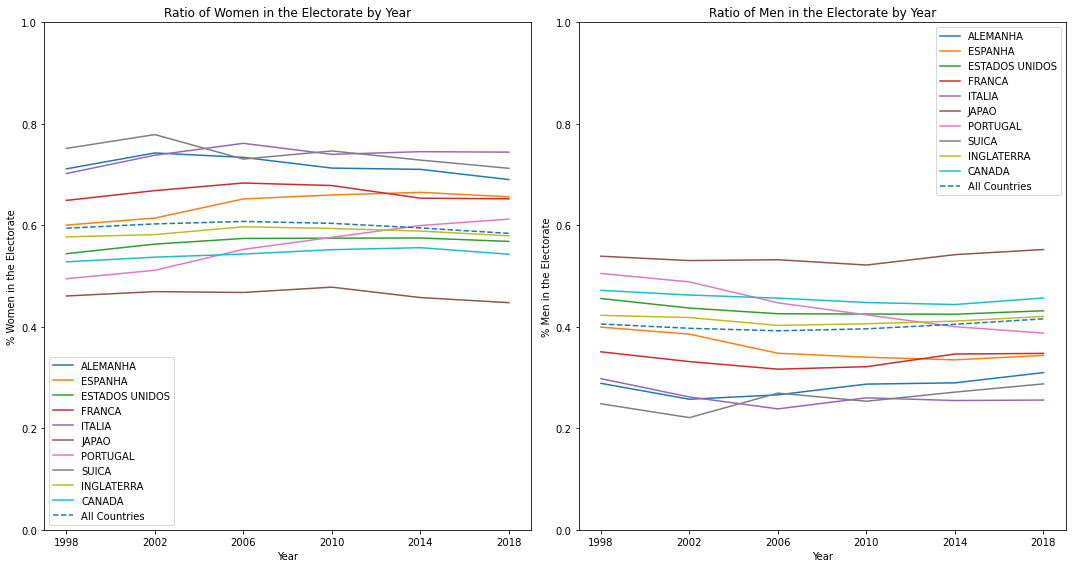

In [42]:
plot_gender_ratio_by_country(top_10_countries_gender_ratios, df_combined)

Looking at the graphs above, you can see that for the majority of the top ten countries, women make up the majority of the Brazillian electorate. This trend has not changed much in the period between 1998 - 2018. There doesn't appear to be a trend upward, or downward 

If we compare these top 10 countries to the overall dataset (where the gender ratio has remained relatively constant at 60% women and 40% men), we can see that the proportion of women voters is higher in Switzerland, Italy, Germany, France, and Spain that the dataset average (acorss all years). Meanwhile, in Japan, Canada, the US, and England, the proportion of male voters has remained higher than the dataset average across all years. Portugal is the one exception in our dataset where the voting population has shifted from having more male voters to more female voters (in comparison to the dataset average) over the years analyzed.

## Educational Attainment in Top 10 Countries
The graphs below show the trends for educational attainment of the top 10 countries over all datasets. Analysis is included at the end of the section.

In [43]:
def plot_education_by_country(df, education_level, gender = None):
    
    countries = df["municipality_name"].unique()
    years = df["election_year"].unique()
    years = years[:-1]
    
    if gender is not None:
        df = df[df["gender_description"] == gender]
    
   
    
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        sum_educations = []
        for year in years:
            df_year = df_country[df_country["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["educational_attainment_description"] == education_level]
            sum_education = df_year["quantity_of_voters"].sum()
            ratio_education = sum_education / sum_all
            sum_educations.append(ratio_education)
        
        plt.plot(years, sum_educations, label = str(country))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the education attainment: " + str(education_level))
    plt.legend(loc="upper left")
    if gender is not None:
        plt.title("Ratio of voters with the educational attainment: " + str(education_level) + " by Year: " + gender)
        
    else:
        plt.title("Ratio of voters with the educational attainment: " + str(education_level) + " by Year")
    plt.show()
    
def plot_education_ratios(df):
    
    educations = df["educational_attainment_description"].unique()
    years = df["election_year"].unique()
    years = years[:-1]
    educations = educations[:-1]
    
   
    
    for education in educations:
        sum_educations = []
        for year in years:
            df_year = df[df["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["educational_attainment_description"] == education]
            sum_education = df_year["quantity_of_voters"].sum()
            ratio_education = sum_education / sum_all
            sum_educations.append(ratio_education)
        
        plt.plot(years, sum_educations, label = str(education))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the education attainment")
    plt.legend(loc="upper left")
    plt.title("Ratio of voters with the educational attainment by Year (Aggregate Top Ten Countries)")
    plt.ylim(0,.5)
    plt.show()
    
    

    

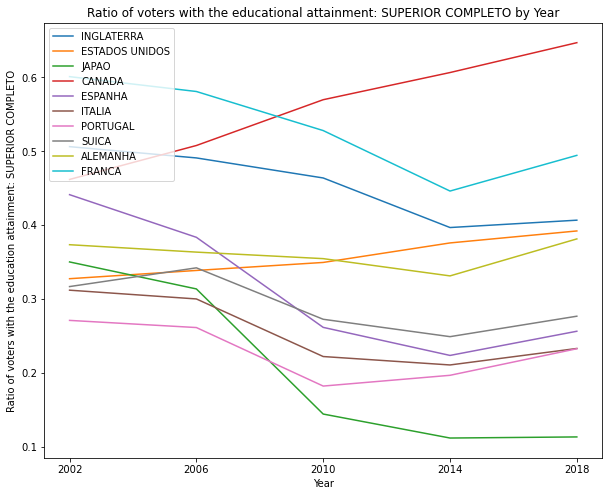

In [44]:
plot_education_by_country(top_10, "SUPERIOR COMPLETO")

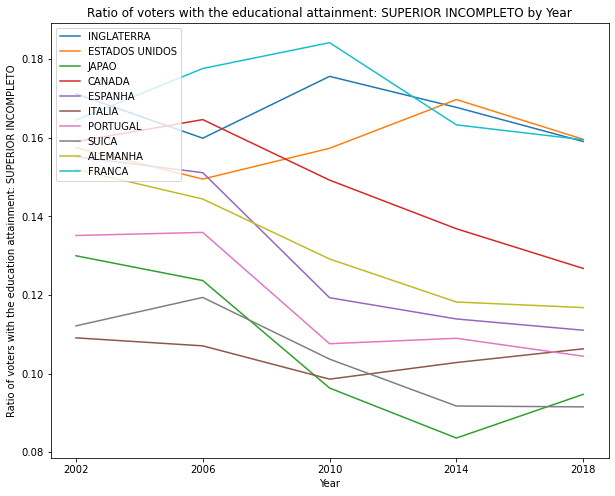

In [45]:
plot_education_by_country(top_10, "SUPERIOR INCOMPLETO")

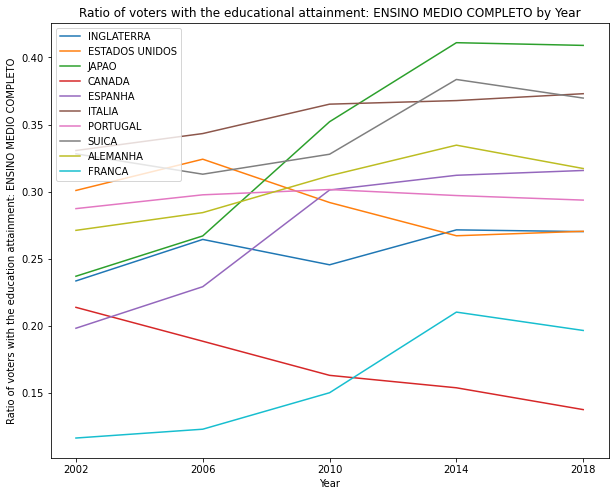

In [46]:
plot_education_by_country(top_10, "ENSINO MEDIO COMPLETO")

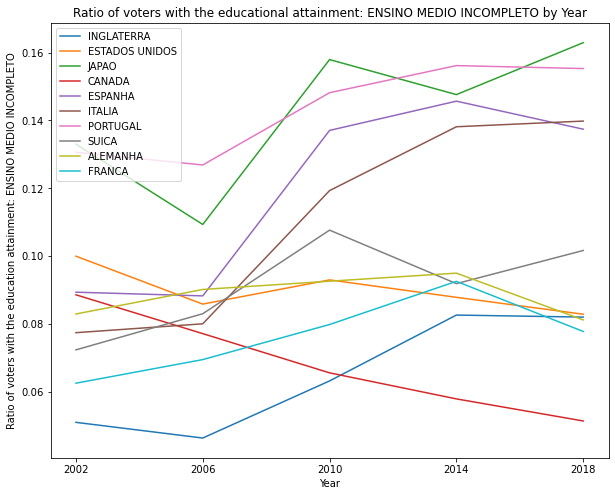

In [47]:
plot_education_by_country(top_10, "ENSINO MEDIO INCOMPLETO")

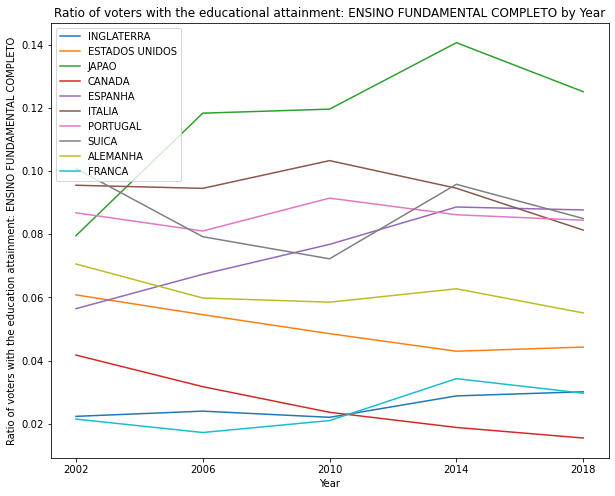

In [48]:
plot_education_by_country(top_10, "ENSINO FUNDAMENTAL COMPLETO")

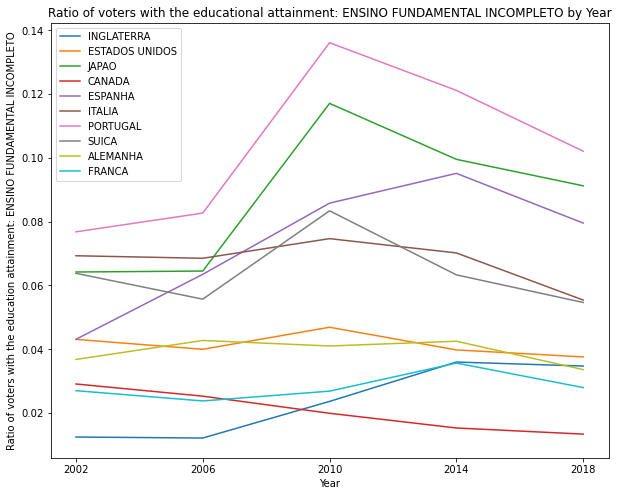

In [49]:
plot_education_by_country(top_10, "ENSINO FUNDAMENTAL INCOMPLETO")

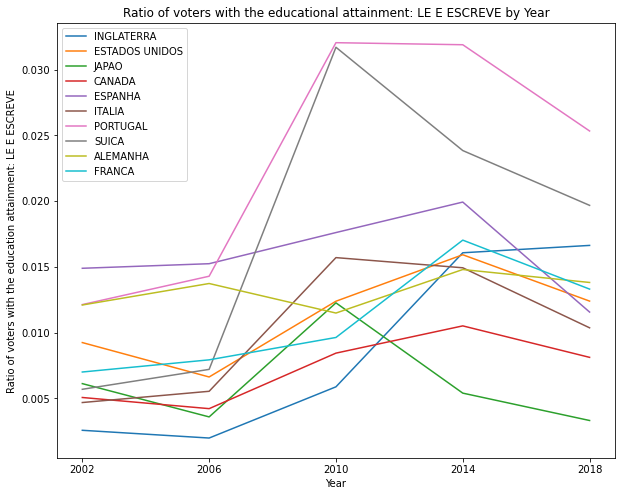

In [50]:
plot_education_by_country(top_10, "LE E ESCREVE")

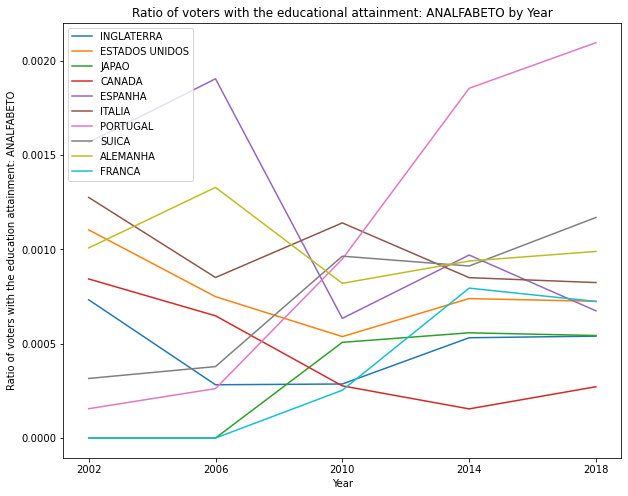

In [51]:
plot_education_by_country(top_10, "ANALFABETO")

Looking at the graphs above, in the the majority of the countries we see an upward trend in the ratio of high school educated and incompletely high School educated voters beginning in 2006. There seems to be a downward trend the ratio of voters who have completed or have not completed college in beginning in 2006, which is likely just due to the ratio for high school education level ratios increasing. In 2010 we see a peak for voters with complete or incomplete elementary education, then a trend downards. We cannot interpret a trends for literate and illiterate voter ratios as their ratios are inconsequentially small.

## Educational Attainment by Year
The plot below shows the overall educational attainment trends. Analysis is included at the end of the section.

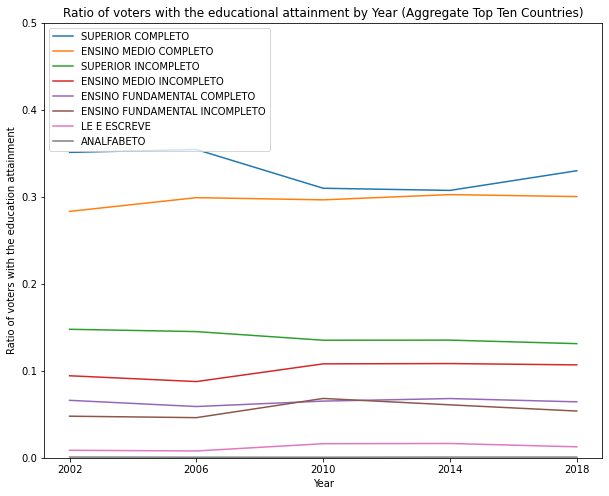

In [52]:
plot_education_ratios(top_10)

When looking at the general trends over all years, we see that the ratio of voters who have a completed college education has actually dropped, especially from 2006 to 2010. The numbers went up again from 2014 to 2018, but they did not return to pre 2006 levels. Likewise, the ratios of voters who have not finished high school or elementary school actaully increased from 2006 to 2010, before dropping a little from 2014 to 2018. The other educational attainments have remained relatively stable. Once again, we cannot interpret trends for literate and illiterate voters because the numbers are too insignificant. 

## Educational Attainment for Top 10 Countries by Gender and Year
The plots below show educational trends in the top 10 countries for men and women by year. Analysis is included at the end of the section. Note that we didn't incorporate graphs for illiterate and literate voters because their numbers are inconsequentially small.

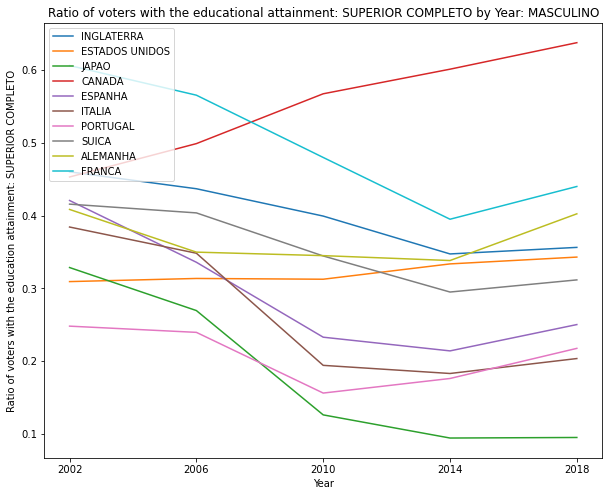

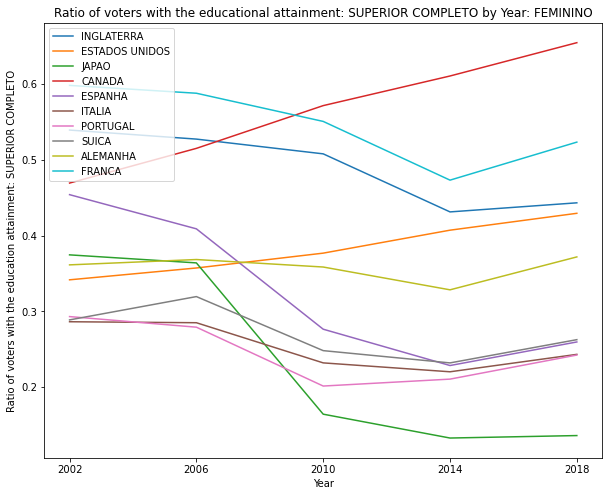

In [53]:
plot_education_by_country(top_10, "SUPERIOR COMPLETO", "MASCULINO")
plot_education_by_country(top_10, "SUPERIOR COMPLETO", "FEMININO")

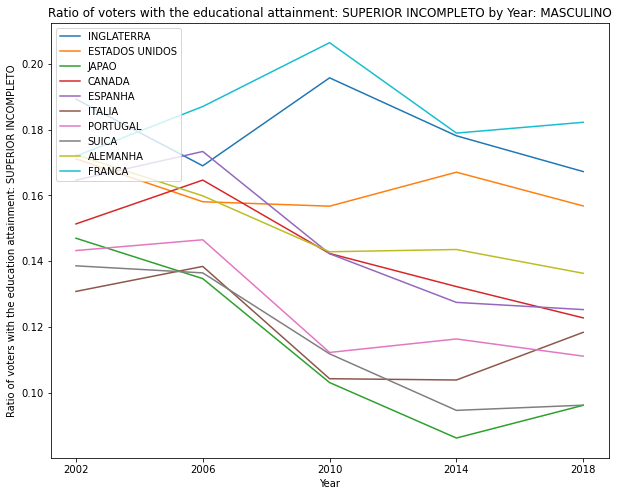

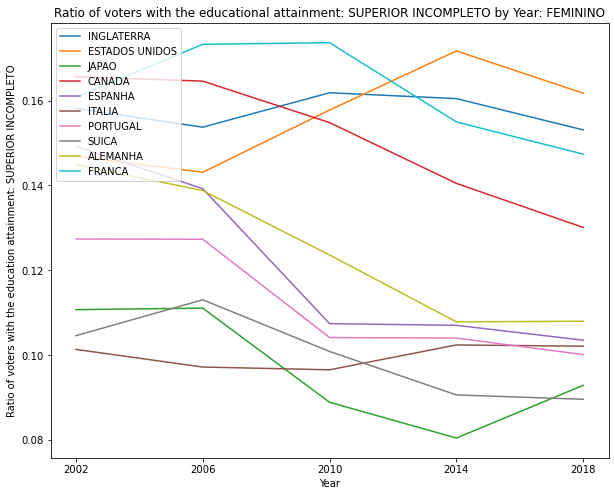

In [54]:
plot_education_by_country(top_10, "SUPERIOR INCOMPLETO", "MASCULINO")

plot_education_by_country(top_10, "SUPERIOR INCOMPLETO", "FEMININO")

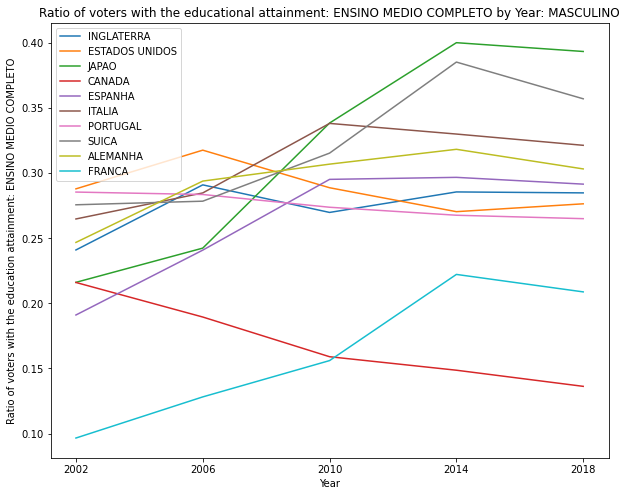

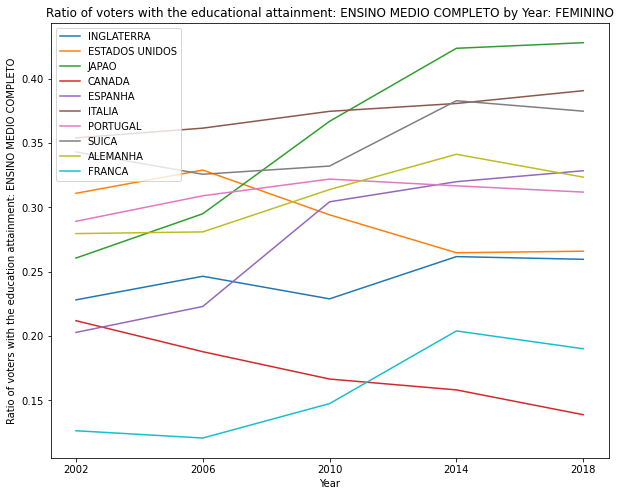

In [55]:
plot_education_by_country(top_10, "ENSINO MEDIO COMPLETO", "MASCULINO")

plot_education_by_country(top_10, "ENSINO MEDIO COMPLETO", "FEMININO")

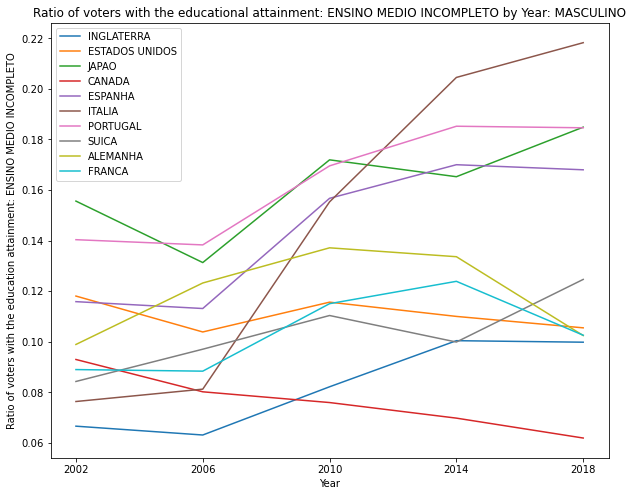

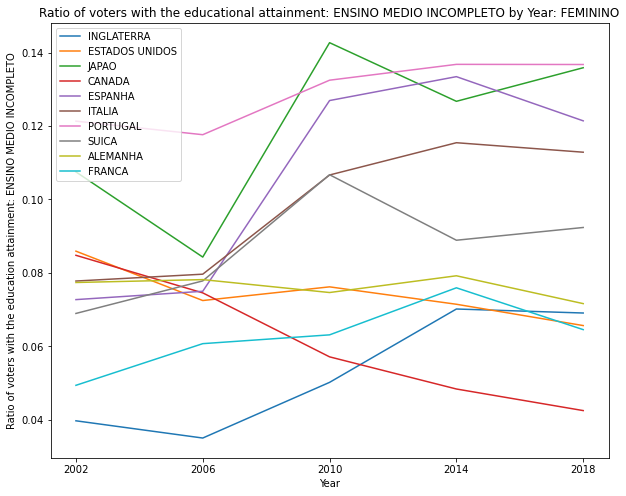

In [56]:
plot_education_by_country(top_10, "ENSINO MEDIO INCOMPLETO", "MASCULINO")

plot_education_by_country(top_10, "ENSINO MEDIO INCOMPLETO", "FEMININO")

For most countries except for the United States and Canada, where the ratios increased, the ratios of college educated men and women both went down. Similar but opposite patterns appear for high school education, where the ratios of high school educated men and women both increased, except for in the US and Canada, where they decreased. For incomplete college education, the trend is universally downwards for men. For women, the trends are similar except for in the US where the numbers of incompletely college educated men increased. For incomplete high school education, the trends for both men and women are going up as a whole, but significant increases occured in the countries of Japan and Spain. Similarly, the exceptions to this were once again Canada and the US, where the n

## Age Analysis of Top 10 Countries

In [57]:
import matplotlib.pyplot as plt

def plot_age_by_country(df, df_combined, age, gender = None):
    '''
    Plots the ratio of age groups for the top 10 countries (as well as the overall dataset average)
    :param df - A pandas dataframe with the information on the top 10 countries
    :param df_combined - A pandas dataframe with information on the entire electorate
    :param age - The age group description
    :param gender - The gender description (MASCULINO/FEMININO) or None to display both genders
    
    '''
    
    countries = df["municipality_name"].unique()
    years = df["election_year"].unique()
    
    if gender is not None:
        df = df[df["gender_description"] == gender]
        df_combined = df_combined[df_combined["gender_description"] == gender]
    
    for country in countries:
        df_country = df[df["municipality_name"] == country]
        sum_ages = []    
        for year in years:
            df_year = df_country[df_country["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["age_group_description"] == age]
            sum_age = df_year["quantity_of_voters"].sum()
            ratio_age = sum_age / sum_all
            sum_ages.append(ratio_age)
        
        plt.plot(years, sum_ages, label = str(country))
    
    #Plot data for overall electorate
    total_ratios = [0 for year in years]
    for index, year in enumerate(years):
        total_voters = df_combined[df_combined["election_year"] == year].quantity_of_voters.sum()
        total_age = df_combined[(df_combined["age_group_description"] == age) & (df_combined["election_year"] == year)].quantity_of_voters.sum()
        total_ratios[index] = total_age/total_voters
    
    plt.plot(years, total_ratios, '--', label="All Countries")
    
    
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the age: " + str(age))
    plt.legend(loc="upper left")
    
    #Appendix to add to filename when save image
    fname_app = ''
    
    if gender is not None:
        plt.title("Ratio of voters with the age: " + str(age) + " by Year: " + gender)
        fname_app  = '_'+str(gender)
        
    else:
        plt.title("Ratio of voters with the age: " + str(age) + " by Year")
        fname_app = '_all_genders'
    
    fname_app = age.replace(" ", "_") + fname_app
    plt.savefig("../readme_images/top_10_age_{}.png".format(fname_app), facecolor='w')
    
    
    plt.show()
    

def plot_age_ratios(df):
    '''
    Plots the ratios for each age group in the top 10 countries by year
    param: df - The data for the top 10 countries
    '''
    
    #Helper function to eliminate "INVALIDO" entries
    def filter_ages(age):
        age = age.strip().split()
        if age[0].isnumeric() or age[0] == 'SUPERIOR':
            return True
        else:
            return False
    
    #Get Ages
    ages = list(df["age_group_description"].unique())
    ages.remove(np.nan)#remove nans
    ages = [age for age in ages if filter_ages(age)]
    
    years = df["election_year"].unique()
    
   
    #Add Age Group Data 
    for age in ages:
        sum_ages = []
        for year in years:
            df_year = df[df["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["age_group_description"] == age]
            sum_age = df_year["quantity_of_voters"].sum()
            ratio_age = sum_age / sum_all
            sum_ages.append(ratio_age)
        
        plt.plot(years, sum_ages, label = str(age))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters in the Age Group")
    plt.legend(loc="best")
    plt.title("Ratio of voters each Age Group by year by Year (Aggregate Top Ten Countries)")
    plt.ylim(0,.8)
    plt.savefig("../readme_images/top_10_all_ages.png", facecolor='w')
    plt.show()

### Age Group Distribution in Top 10
Below, we plot the overall age group distrubution in the top 10 countries. From this plot, we can see that the majority of the populations in these countries fall into an age range of 25-59, with all other age groups combined comprising less than 25% of the overall population

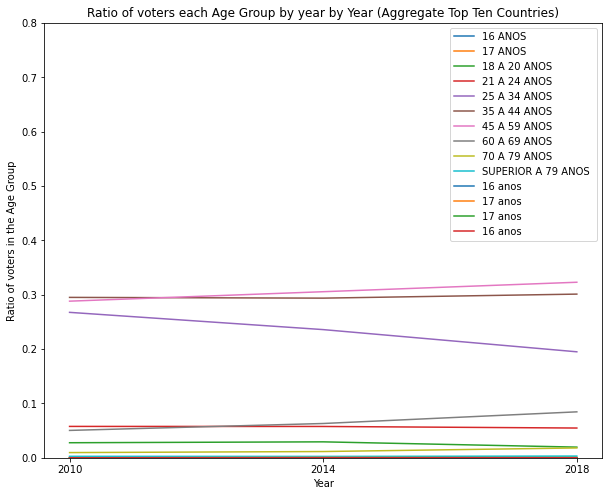

In [58]:
combined_for_age = combine_data(df_2010, df_2014, df_2018)
top_10_for_age = get_top_N(combined_for_age, countries_2018, 10)
plot_age_ratios(top_10_for_age)


### Analysis of Age Group Categories
Next, we look at each of the age group categories to analyze how they have changed by country over the years 2010-2018

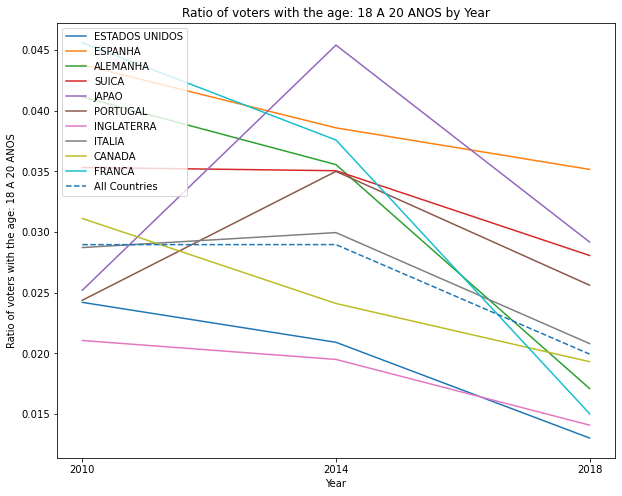

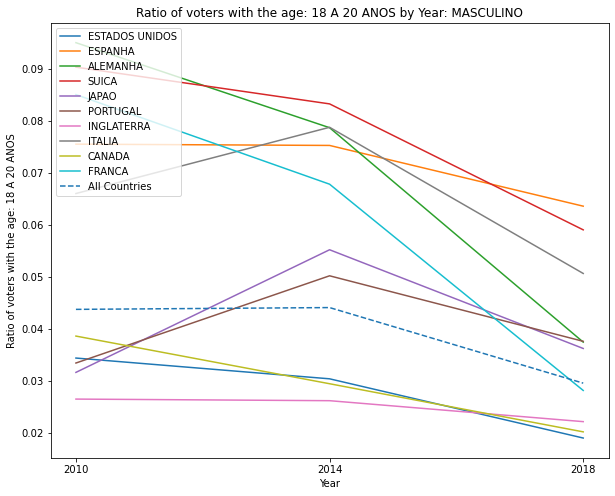

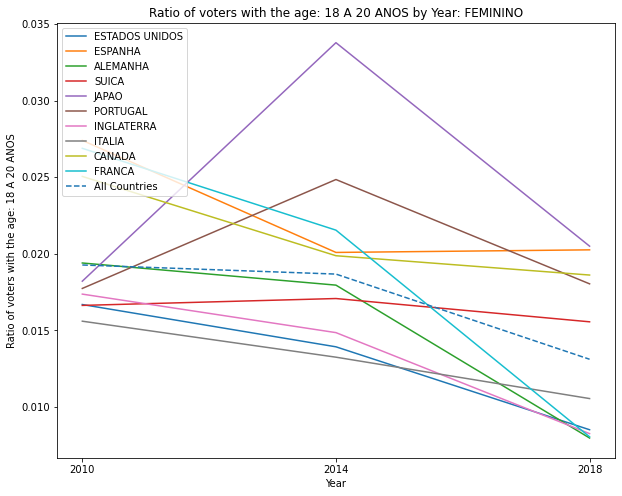

In [59]:
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "18 A 20 ANOS", "FEMININO")

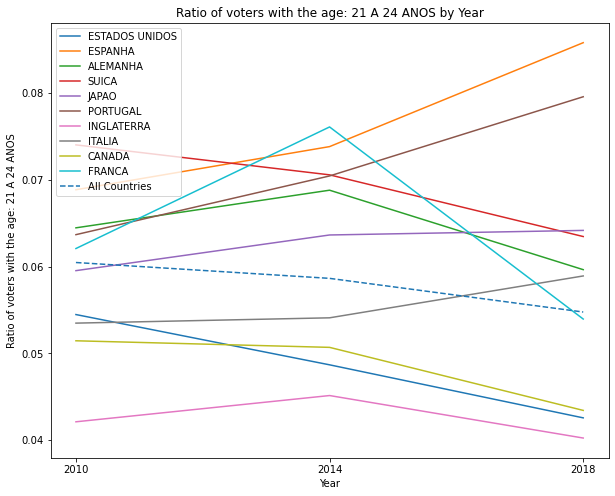

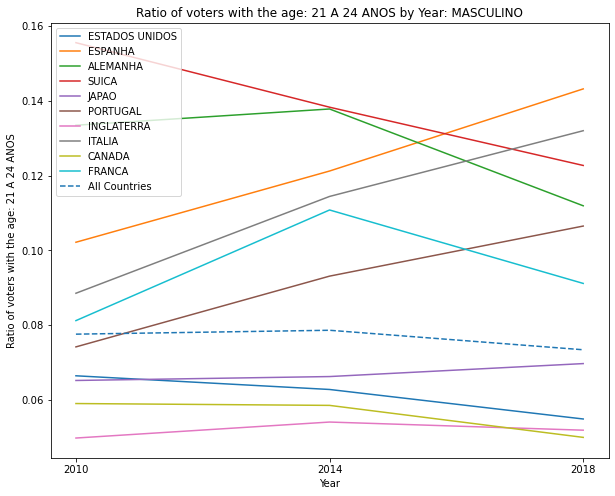

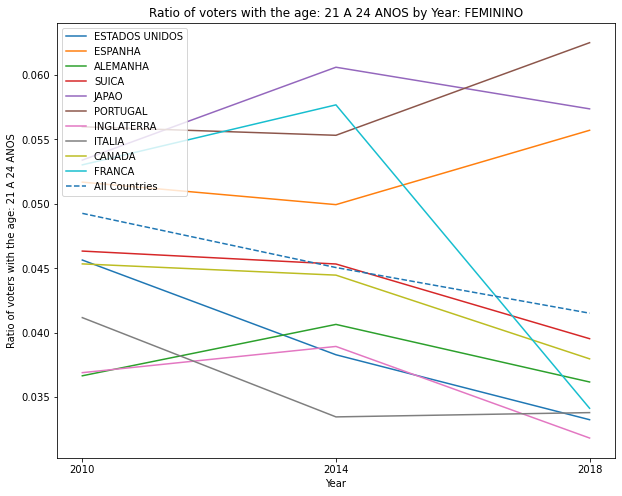

In [60]:
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "21 A 24 ANOS", "FEMININO")

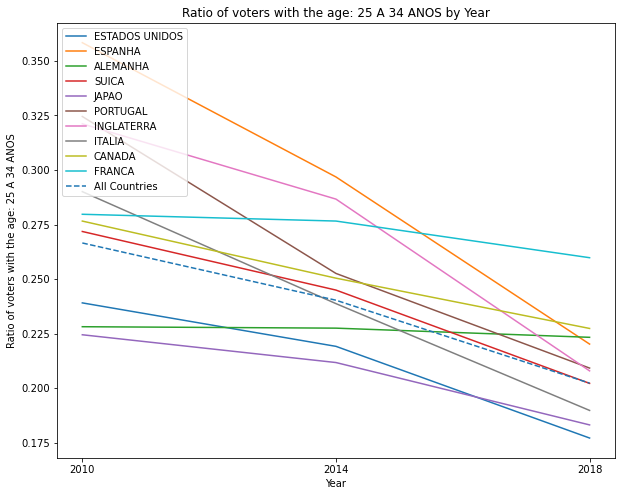

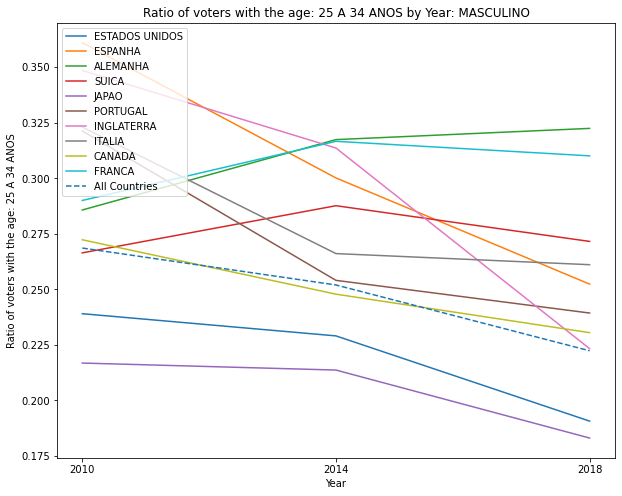

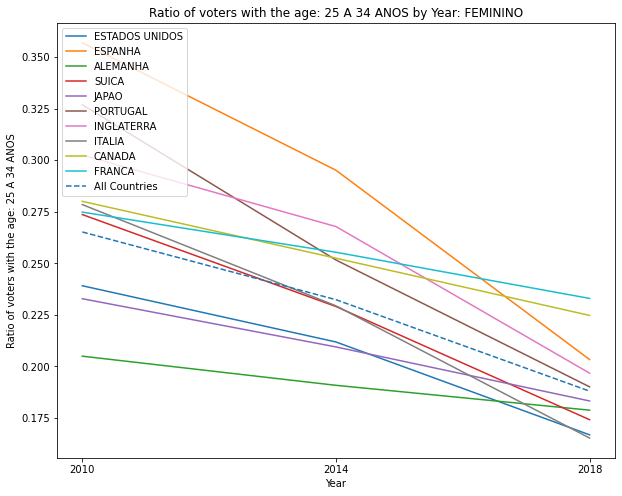

In [61]:
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "25 A 34 ANOS", "FEMININO")

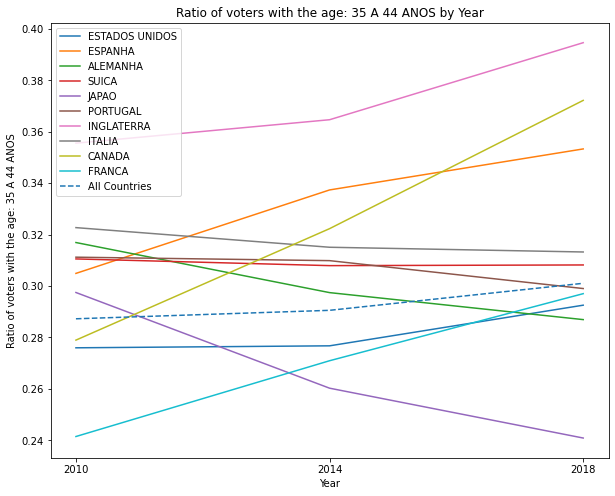

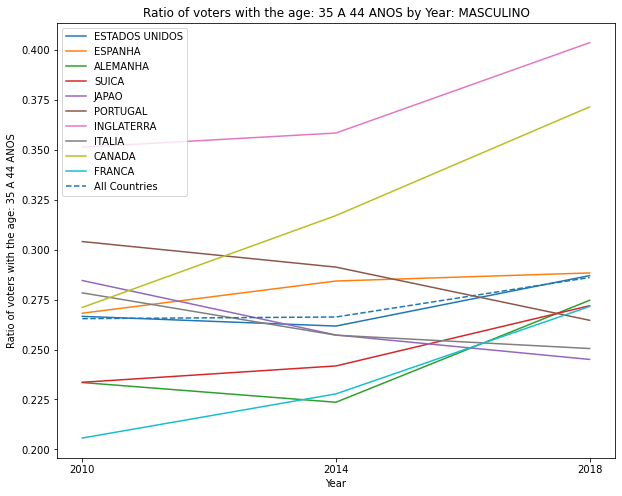

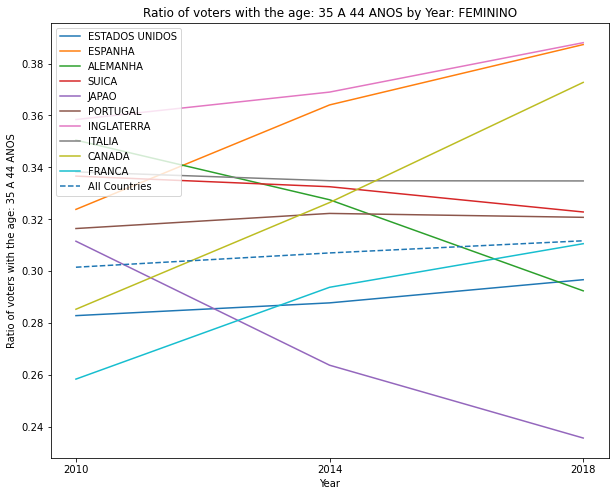

In [62]:
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "35 A 44 ANOS", "FEMININO")

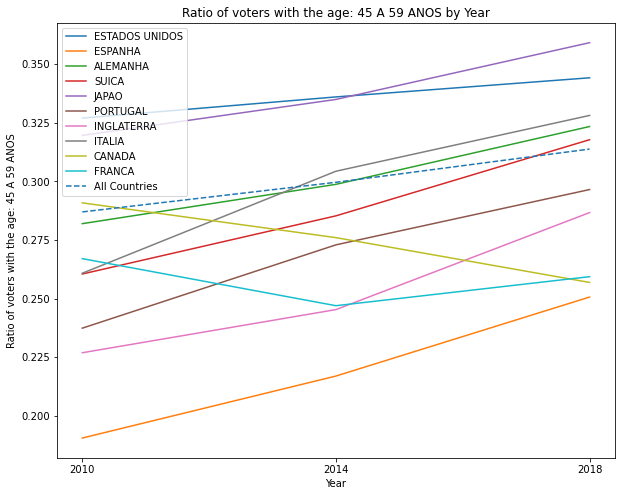

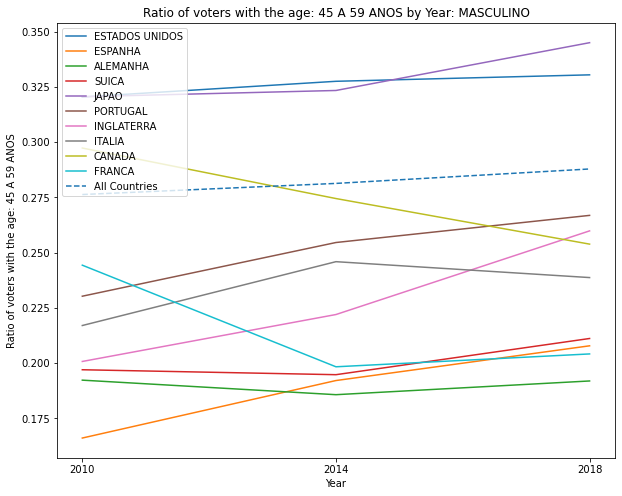

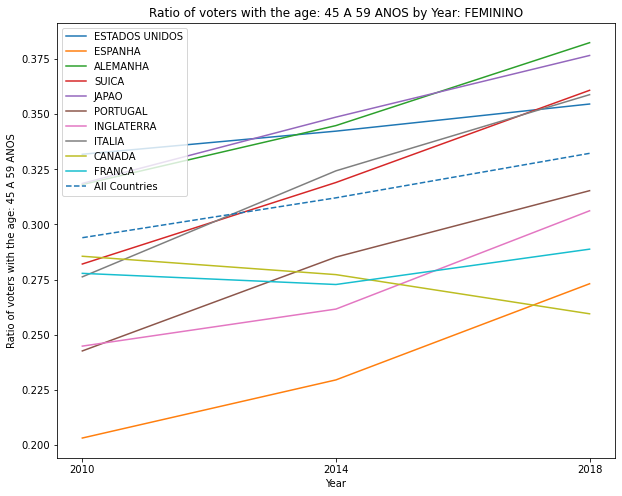

In [63]:
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "45 A 59 ANOS", "FEMININO")

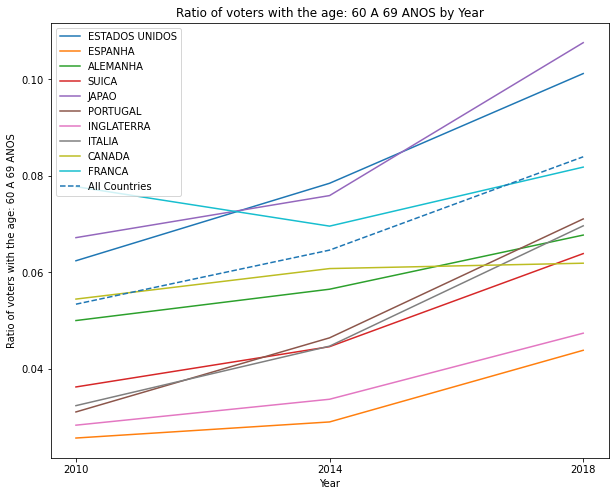

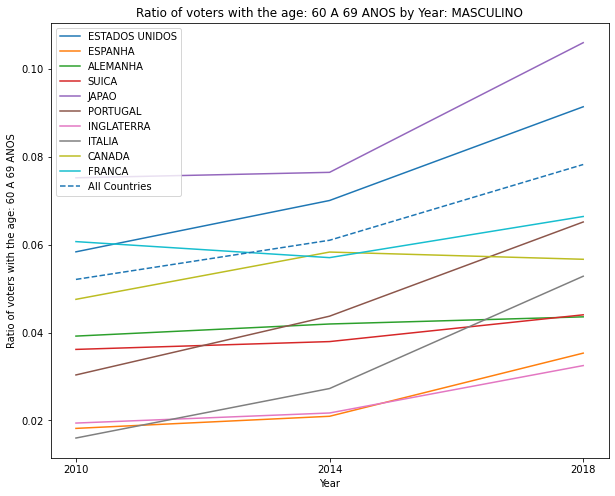

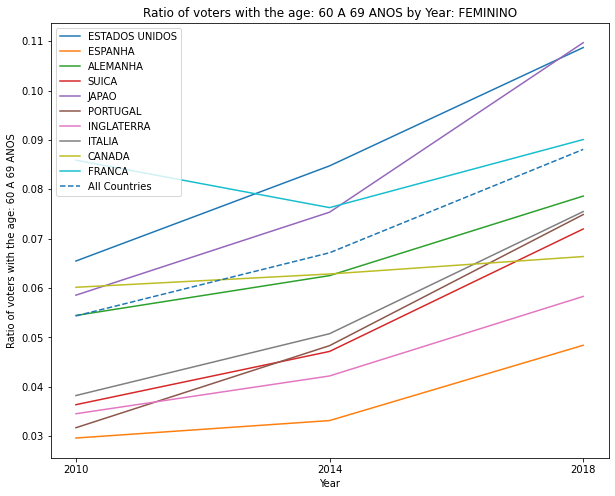

In [64]:
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "60 A 69 ANOS", "FEMININO")

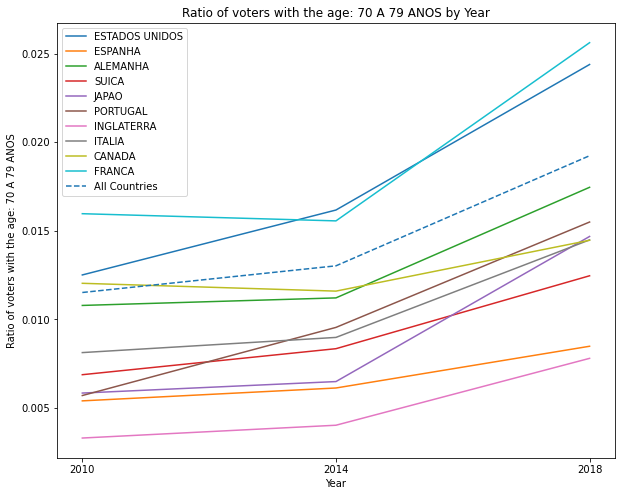

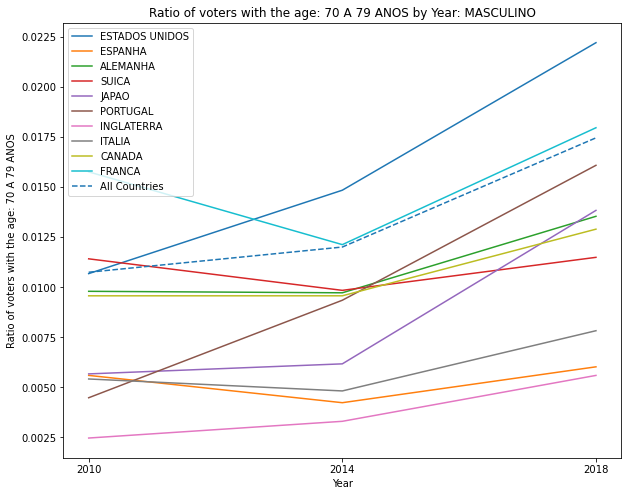

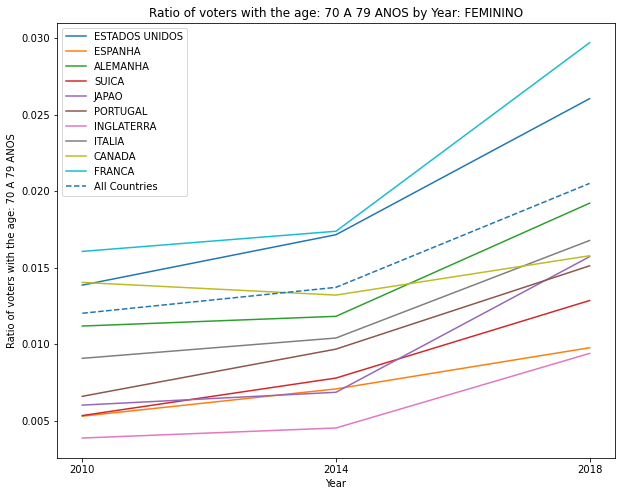

In [65]:
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS")
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS", "MASCULINO")
plot_age_by_country(top_10_for_age, df_combined, "70 A 79 ANOS", "FEMININO")